# 데이터 불러오기

In [0]:
# import numpy and pandas
import numpy as np
import pandas as pd

# used for dates
import datetime
from datetime import datetime, date

# Set some pandas options controlling output format
#pd.set_option('display.notebook_repr_html', False)
#pd.set_option('display.max_columns', 8)
#pd.set_option('display.max_rows', 10)
#pd.set_option('display.width', 60)

# bring in matplotlib for graphics
import matplotlib.pyplot as plt
%matplotlib inline

congest= pd.read_csv("C:/Users/KANG HOSEUNG/Desktop/data/congest_rate.csv", encoding='cp949', dtype=str)
ppl=pd.read_csv("C:/Users/KANG HOSEUNG/Desktop/data/유동인구.csv", encoding='cp949', dtype=str)
congest_real=pd.read_csv("C:/Users/KANG HOSEUNG/Desktop/data/차량내혼잡도_2017.csv", encoding='cp949', dtype=str)

FileNotFoundError: ignored

# 혼잡도 - 계산된 혼잡도

In [0]:
congest

,BAS_DT,STA_CD,STA_NM,BAS_TIME,TRANSFER,INOUT_CNT,TRAIN_CNT,AVGCNT,CURPPL,FULL,CONGES_RATE
0,2019-10-01,0150,서울역,06,1,2446,27,562.4,3008.4,14580,20.63374485596708
1,2019-10-01,0151,시청,06,1,1006,28,470.4,1476.4,15120,9.764550264550264
2,2019-10-01,0152,종각,06,0,1589,28,427.20000000000005,2016.2,15120,13.334656084656086
3,2019-10-01,0153,종로3가,06,1,738,27,458.40000000000003,1196.4,14580,8.20576131687243
4,2019-10-01,0154,종로5가,06,0,824,28,466.4,1290.4,15120,8.534391534391535
...,...,...,...,...,...,...,...,...,...,...,...
53545,2019-10-31,0430,이촌(국립중앙박물관),23,1,426,11,833.6000000000001,1259.6000000000001,5940,21.205387205387208
53546,2019-10-31,0431,동작(현충원),23,1,140,9,931.1999999999999,1071.1999999999998,4860,22.04115226337448
53547,2019-10-31,0432,총신대입구(이수),23,1,1217,10,935.2000000000002,2152.2000000000003,5400,39.85555555555556
53548,2019-10-31,0433,사당,23,1,1825,9,953.6000000000001,2778.6000000000004,4860,57.17283950617285


In [0]:
congest['호선']=congest['STA_CD'].str.slice(start=0, stop=2)
congest
col=['INOUT_CNT','TRAIN_CNT','AVGCNT','호선','CONGES_RATE','TRANSFER','STA_CD','BAS_TIME']
congest[col]=congest[col].apply(pd.to_numeric, errors='coerce',axis=1)

In [0]:
congest['date']=pd.to_datetime(congest['BAS_DT'])
congest['year']=congest['date'].dt.year
congest['month']=congest['date'].dt.month
congest['day']=congest['date'].dt.day

공휴일 제거

In [0]:
congest=congest.loc[congest.day != 3]
congest=congest.loc[congest.day != 5]
congest=congest.loc[congest.day != 6]
congest=congest.loc[congest.day != 9]
congest=congest.loc[congest.day != 12]
congest=congest.loc[congest.day != 13]
congest=congest.loc[congest.day != 19]
congest=congest.loc[congest.day != 20]
congest=congest.loc[congest.day != 26]
congest=congest.loc[congest.day != 27]
congest

,BAS_DT,STA_CD,STA_NM,BAS_TIME,TRANSFER,INOUT_CNT,TRAIN_CNT,AVGCNT,CURPPL,FULL,CONGES_RATE,호선,date,year,month,day
0,2019-10-01,150.0,서울역,6.0,1.0,2446.0,27.0,562.4,3008.4,14580,20.633745,1.0,2019-10-01,2019,10,1
1,2019-10-01,151.0,시청,6.0,1.0,1006.0,28.0,470.4,1476.4,15120,9.764550,1.0,2019-10-01,2019,10,1
2,2019-10-01,152.0,종각,6.0,0.0,1589.0,28.0,427.2,2016.2,15120,13.334656,1.0,2019-10-01,2019,10,1
3,2019-10-01,153.0,종로3가,6.0,1.0,738.0,27.0,458.4,1196.4,14580,8.205761,1.0,2019-10-01,2019,10,1
4,2019-10-01,154.0,종로5가,6.0,0.0,824.0,28.0,466.4,1290.4,15120,8.534392,1.0,2019-10-01,2019,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53545,2019-10-31,430.0,이촌(국립중앙박물관),23.0,1.0,426.0,11.0,833.6,1259.6000000000001,5940,21.205387,4.0,2019-10-31,2019,10,31
53546,2019-10-31,431.0,동작(현충원),23.0,1.0,140.0,9.0,931.2,1071.1999999999998,4860,22.041152,4.0,2019-10-31,2019,10,31
53547,2019-10-31,432.0,총신대입구(이수),23.0,1.0,1217.0,10.0,935.2,2152.2000000000003,5400,39.855556,4.0,2019-10-31,2019,10,31
53548,2019-10-31,433.0,사당,23.0,1.0,1825.0,9.0,953.6,2778.6000000000004,4860,57.172840,4.0,2019-10-31,2019,10,31


환승역 구분

In [0]:
#congest_transfer=congest.loc[congest.TRANSFER == 1]
#congest=congest.loc[congest.TRANSFER ==0]
#congest

날짜를 무시하고 10월 평일 전체 평균으로 계산

In [0]:
grouped=congest.groupby(['STA_CD','BAS_TIME'],as_index=False)
grouped_mean=grouped.mean()
grouped_mean

,STA_CD,BAS_TIME,TRANSFER,INOUT_CNT,TRAIN_CNT,AVGCNT,CONGES_RATE,호선,year,month,day
0,150.0,6.0,1.0,2719.000000,27.0,562.4,22.506173,1.0,2019.0,10.0,16.952381
1,150.0,7.0,1.0,6438.380952,31.0,1098.4,45.022586,1.0,2019.0,10.0,16.952381
2,150.0,8.0,1.0,13635.952381,34.0,1828.0,84.226320,1.0,2019.0,10.0,16.952381
3,150.0,9.0,1.0,9233.666667,32.0,1240.0,60.611497,1.0,2019.0,10.0,16.952381
4,150.0,10.0,1.0,5310.904762,27.0,890.4,42.532954,1.0,2019.0,10.0,16.952381
...,...,...,...,...,...,...,...,...,...,...,...
2137,434.0,19.0,0.0,156.571429,17.0,2172.8,25.374416,4.0,2019.0,10.0,16.952381
2138,434.0,20.0,0.0,95.142857,15.0,1627.2,21.263492,4.0,2019.0,10.0,16.952381
2139,434.0,21.0,0.0,90.285714,16.0,1394.4,17.183862,4.0,2019.0,10.0,16.952381
2140,434.0,22.0,0.0,62.190476,10.0,1556.8,29.981305,4.0,2019.0,10.0,16.952381


호선 분리

In [0]:
indexed_df=grouped_mean.set_index('호선')
line1=indexed_df.xs(1)
congest_line1=line1.reset_index()
line2=indexed_df.xs(2)
congest_line2=line2.reset_index()
line3=indexed_df.xs(3)
congest_line3=line3.reset_index()
line4=indexed_df.xs(4)
congest_line4=line4.reset_index()
congest_line1

,호선,STA_CD,BAS_TIME,TRANSFER,INOUT_CNT,TRAIN_CNT,AVGCNT,CONGES_RATE,year,month,day
0,1.0,150.0,6.0,1.0,2719.000000,27.0,562.4,22.506173,2019.0,10.0,16.952381
1,1.0,150.0,7.0,1.0,6438.380952,31.0,1098.4,45.022586,2019.0,10.0,16.952381
2,1.0,150.0,8.0,1.0,13635.952381,34.0,1828.0,84.226320,2019.0,10.0,16.952381
3,1.0,150.0,9.0,1.0,9233.666667,32.0,1240.0,60.611497,2019.0,10.0,16.952381
4,1.0,150.0,10.0,1.0,5310.904762,27.0,890.4,42.532954,2019.0,10.0,16.952381
...,...,...,...,...,...,...,...,...,...,...,...
175,1.0,159.0,19.0,1.0,776.619048,31.0,1184.8,11.716960,2019.0,10.0,16.952381
176,1.0,159.0,20.0,1.0,475.952381,30.0,740.0,7.505879,2019.0,10.0,16.952381
177,1.0,159.0,21.0,1.0,465.190476,27.0,896.0,9.336011,2019.0,10.0,16.952381
178,1.0,159.0,22.0,1.0,392.000000,24.0,957.6,10.413580,2019.0,10.0,16.952381


# 실제 혼잡도 데이터

In [0]:
congest_real

,Unnamed: 0,사용일,호선,역명,sta_no,상하선,time,count
0,0,평일,1,동대문,155,1,05,136.0
1,1,평일,1,동대문,155,1,06,161.6
2,2,평일,1,동대문,155,1,07,262.4
3,3,평일,1,동대문,155,1,08,460.0
4,4,평일,1,동대문,155,1,09,416.79999999999995
...,...,...,...,...,...,...,...,...
4515,4515,평일,4,회현,425,2,20,578.4
4516,4516,평일,4,회현,425,2,21,667.2
4517,4517,평일,4,회현,425,2,22,784.0
4518,4518,평일,4,회현,425,2,23,528.8


In [0]:
col=['호선','sta_no','time','count']
congest_real[col]=congest_real[col].apply(pd.to_numeric, errors='coerce',axis=1)

In [0]:
congest_real=congest_real.loc[congest_real.time != 5]
congest_real=congest_real.loc[congest_real.time != 24]
congest_real

,Unnamed: 0,사용일,호선,역명,sta_no,상하선,time,count
1,1,평일,1.0,동대문,155.0,1,6.0,161.6
2,2,평일,1.0,동대문,155.0,1,7.0,262.4
3,3,평일,1.0,동대문,155.0,1,8.0,460.0
4,4,평일,1.0,동대문,155.0,1,9.0,416.8
5,5,평일,1.0,동대문,155.0,1,10.0,391.2
...,...,...,...,...,...,...,...,...
4514,4514,평일,4.0,회현,425.0,2,19.0,616.8
4515,4515,평일,4.0,회현,425.0,2,20.0,578.4
4516,4516,평일,4.0,회현,425.0,2,21.0,667.2
4517,4517,평일,4.0,회현,425.0,2,22.0,784.0


실제 혼잡도 계산

In [0]:
congest_real['congest']=congest_real['count']/16
congest_real

,Unnamed: 0,사용일,호선,역명,sta_no,상하선,time,count,congest
1,1,평일,1.0,동대문,155.0,1,6.0,161.6,10.10
2,2,평일,1.0,동대문,155.0,1,7.0,262.4,16.40
3,3,평일,1.0,동대문,155.0,1,8.0,460.0,28.75
4,4,평일,1.0,동대문,155.0,1,9.0,416.8,26.05
5,5,평일,1.0,동대문,155.0,1,10.0,391.2,24.45
...,...,...,...,...,...,...,...,...,...
4514,4514,평일,4.0,회현,425.0,2,19.0,616.8,38.55
4515,4515,평일,4.0,회현,425.0,2,20.0,578.4,36.15
4516,4516,평일,4.0,회현,425.0,2,21.0,667.2,41.70
4517,4517,평일,4.0,회현,425.0,2,22.0,784.0,49.00


상하행 구분 없이 혼잡도 평균 계산

In [0]:
grouped=congest_real.groupby(['sta_no','time'],as_index=False)
grouped_mean=grouped.mean()
grouped_mean

,sta_no,time,호선,count,congest
0,150.0,6.0,1.0,281.2,17.575
1,150.0,7.0,1.0,549.2,34.325
2,150.0,8.0,1.0,914.0,57.125
3,150.0,9.0,1.0,620.0,38.750
4,150.0,10.0,1.0,445.2,27.825
...,...,...,...,...,...
2029,434.0,19.0,4.0,1086.4,67.900
2030,434.0,20.0,4.0,813.6,50.850
2031,434.0,21.0,4.0,697.2,43.575
2032,434.0,22.0,4.0,778.4,48.650


호선 분리

In [0]:
indexed_df=grouped_mean.set_index('호선')
line1=indexed_df.xs(1)
congest_real_line1=line1.reset_index()
line2=indexed_df.xs(2)
congest_real_line2=line2.reset_index()
line3=indexed_df.xs(3)
congest_real_line3=line3.reset_index()
line4=indexed_df.xs(4)
congest_real_line4=line4.reset_index()
congest_real_line1

,호선,sta_no,time,count,congest
0,1.0,150.0,6.0,281.2,17.575
1,1.0,150.0,7.0,549.2,34.325
2,1.0,150.0,8.0,914.0,57.125
3,1.0,150.0,9.0,620.0,38.750
4,1.0,150.0,10.0,445.2,27.825
...,...,...,...,...,...
175,1.0,159.0,19.0,592.4,37.025
176,1.0,159.0,20.0,370.0,23.125
177,1.0,159.0,21.0,448.0,28.000
178,1.0,159.0,22.0,478.8,29.925


# 계산된 혼잡도와 실제 혼잡도 비교

서울역

In [0]:
seoul_cal=congest_line1.loc[congest_line1.STA_CD == 150]
seoul_cal

,호선,STA_CD,BAS_TIME,TRANSFER,INOUT_CNT,TRAIN_CNT,AVGCNT,CONGES_RATE,year,month,day
0,1.0,150.0,6.0,1.0,2719.000000,27.0,562.4,22.506173,2019.0,10.0,16.952381
1,1.0,150.0,7.0,1.0,6438.380952,31.0,1098.4,45.022586,2019.0,10.0,16.952381
2,1.0,150.0,8.0,1.0,13635.952381,34.0,1828.0,84.226320,2019.0,10.0,16.952381
3,1.0,150.0,9.0,1.0,9233.666667,32.0,1240.0,60.611497,2019.0,10.0,16.952381
4,1.0,150.0,10.0,1.0,5310.904762,27.0,890.4,42.532954,2019.0,10.0,16.952381
5,1.0,150.0,11.0,1.0,5414.428571,28.0,1067.2,42.867914,2019.0,10.0,16.952381
6,1.0,150.0,12.0,1.0,5713.666667,26.0,1132.8,48.764008,2019.0,10.0,16.952381
7,1.0,150.0,13.0,1.0,5843.428571,25.0,1188.0,52.084656,2019.0,10.0,16.952381
8,1.0,150.0,14.0,1.0,5228.619048,25.0,1133.6,47.127549,2019.0,10.0,16.952381
9,1.0,150.0,15.0,1.0,6287.238095,24.0,1220.0,57.926220,2019.0,10.0,16.952381


In [0]:
seoul_real=congest_real_line1.loc[congest_real_line1.sta_no==150]
seoul_real

,호선,sta_no,time,count,congest
0,1.0,150.0,6.0,281.2,17.575
1,1.0,150.0,7.0,549.2,34.325
2,1.0,150.0,8.0,914.0,57.125
3,1.0,150.0,9.0,620.0,38.750
4,1.0,150.0,10.0,445.2,27.825
5,1.0,150.0,11.0,533.6,33.350
6,1.0,150.0,12.0,566.4,35.400
7,1.0,150.0,13.0,594.0,37.125
8,1.0,150.0,14.0,566.8,35.425
9,1.0,150.0,15.0,610.0,38.125


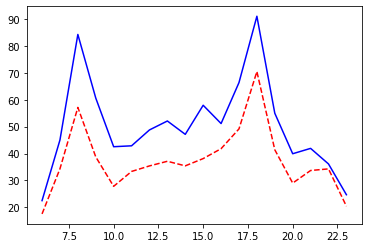

In [0]:
plt.plot(seoul_cal.BAS_TIME,seoul_cal.CONGES_RATE,'b-',seoul_real.time,seoul_real.congest,'r--')

서초역

In [0]:
seocho_cal=congest_line2.loc[congest_line2.STA_CD == 224]
seocho_cal

,호선,STA_CD,BAS_TIME,TRANSFER,INOUT_CNT,TRAIN_CNT,AVGCNT,CONGES_RATE,year,month,day
414,2.0,224.0,6.0,0.0,1111.809524,21.0,1049.6,19.060049,2019.0,10.0,16.952381
415,2.0,224.0,7.0,0.0,2938.714286,33.0,2079.2,28.158890,2019.0,10.0,16.952381
416,2.0,224.0,8.0,0.0,7113.000000,41.0,2968.0,45.532972,2019.0,10.0,16.952381
417,2.0,224.0,9.0,0.0,5659.142857,38.0,2264.0,38.611807,2019.0,10.0,16.952381
418,2.0,224.0,10.0,0.0,2889.714286,27.0,1589.6,30.722320,2019.0,10.0,16.952381
419,2.0,224.0,11.0,0.0,2193.000000,23.0,1501.6,29.747182,2019.0,10.0,16.952381
420,2.0,224.0,12.0,0.0,2167.047619,22.0,1624.8,31.917909,2019.0,10.0,16.952381
421,2.0,224.0,13.0,0.0,2344.809524,21.0,1883.2,37.284035,2019.0,10.0,16.952381
422,2.0,224.0,14.0,0.0,2424.761905,21.0,1768.0,36.973209,2019.0,10.0,16.952381
423,2.0,224.0,15.0,0.0,2608.380952,22.0,2072.8,39.403880,2019.0,10.0,16.952381


In [0]:
seocho_real=congest_real_line2.loc[congest_real_line2.sta_no==224]
seocho_real

,호선,sta_no,time,count,congest
414,2.0,224.0,6.0,524.8,32.800
415,2.0,224.0,7.0,1039.6,64.975
416,2.0,224.0,8.0,1484.0,92.750
417,2.0,224.0,9.0,1132.0,70.750
418,2.0,224.0,10.0,794.8,49.675
419,2.0,224.0,11.0,750.8,46.925
420,2.0,224.0,12.0,812.4,50.775
421,2.0,224.0,13.0,941.6,58.850
422,2.0,224.0,14.0,884.0,55.250
423,2.0,224.0,15.0,1036.4,64.775


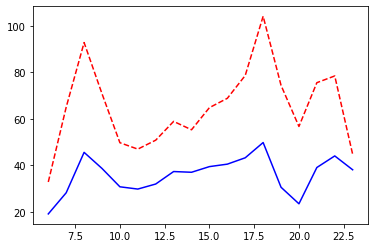

In [0]:
plt.plot(seocho_cal.BAS_TIME,seocho_cal.CONGES_RATE,'b-',seocho_real.time,seocho_real.congest,'r--')

강남역

In [0]:
gangnam_cal=congest_line2.loc[congest_line2.STA_CD == 222]
gangnam_cal

,호선,STA_CD,BAS_TIME,TRANSFER,INOUT_CNT,TRAIN_CNT,AVGCNT,CONGES_RATE,year,month,day
378,2.0,222.0,6.0,1.0,3181.619048,22.0,840.8,33.858746,2019.0,10.0,16.952381
379,2.0,222.0,7.0,1.0,9382.142857,32.0,1696.0,64.109623,2019.0,10.0,16.952381
380,2.0,222.0,8.0,1.0,19010.285714,43.0,2584.0,92.998646,2019.0,10.0,16.952381
381,2.0,222.0,9.0,1.0,17840.523810,37.0,2019.2,99.398017,2019.0,10.0,16.952381
382,2.0,222.0,10.0,1.0,9158.190476,27.0,1397.6,72.399112,2019.0,10.0,16.952381
383,2.0,222.0,11.0,1.0,7974.571429,24.0,1460.8,72.803792,2019.0,10.0,16.952381
384,2.0,222.0,12.0,1.0,8224.380952,21.0,1611.2,86.733518,2019.0,10.0,16.952381
385,2.0,222.0,13.0,1.0,10116.142857,21.0,1872.0,105.715545,2019.0,10.0,16.952381
386,2.0,222.0,14.0,1.0,9739.476190,22.0,1789.6,97.046096,2019.0,10.0,16.952381
387,2.0,222.0,15.0,1.0,10702.333333,21.0,2120.0,113.071723,2019.0,10.0,16.952381


In [0]:
gangnam_real=congest_real_line2.loc[congest_real_line2.sta_no==224]
gangnam_real

,호선,sta_no,time,count,congest
414,2.0,224.0,6.0,524.8,32.800
415,2.0,224.0,7.0,1039.6,64.975
416,2.0,224.0,8.0,1484.0,92.750
417,2.0,224.0,9.0,1132.0,70.750
418,2.0,224.0,10.0,794.8,49.675
419,2.0,224.0,11.0,750.8,46.925
420,2.0,224.0,12.0,812.4,50.775
421,2.0,224.0,13.0,941.6,58.850
422,2.0,224.0,14.0,884.0,55.250
423,2.0,224.0,15.0,1036.4,64.775


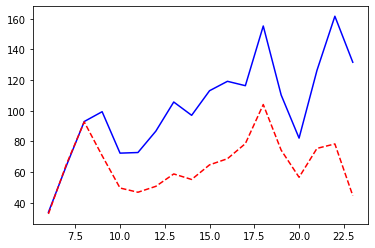

In [0]:
plt.plot(gangnam_cal.BAS_TIME,gangnam_cal.CONGES_RATE,'b-',gangnam_real.time,gangnam_real.congest,'r--')

# 유동인구수

In [0]:
ppl

,날짜,호선,역번호,역명,시간대,date,year,month,day,구,승하차인원,일자,유동인구수,TRANSFER
0,2019-10-01,1,0150,서울역,06,2019-10-01,2019,10,1,중구,2446,20191001,153060.0,1
1,2019-10-01,1,0150,서울역,07,2019-10-01,2019,10,1,중구,6448,20191001,231170.0,1
2,2019-10-01,1,0150,서울역,08,2019-10-01,2019,10,1,중구,13578,20191001,370810.0,1
3,2019-10-01,1,0150,서울역,09,2019-10-01,2019,10,1,중구,9203,20191001,428280.0,1
4,2019-10-01,1,0150,서울역,10,2019-10-01,2019,10,1,중구,4982,20191001,453590.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53095,2019-10-31,4,0434,남태령,19,2019-10-31,2019,10,31,서초구,147,20191031,464040.0,0
53096,2019-10-31,4,0434,남태령,20,2019-10-31,2019,10,31,서초구,110,20191031,433020.0,0
53097,2019-10-31,4,0434,남태령,21,2019-10-31,2019,10,31,서초구,85,20191031,409520.0,0
53098,2019-10-31,4,0434,남태령,22,2019-10-31,2019,10,31,서초구,70,20191031,385540.0,0


In [0]:
col=['유동인구수','승하차인원','시간대','호선','날짜','TRANSFER','day']
ppl[col]=ppl[col].apply(pd.to_numeric, errors='coerce',axis=1)

공휴일데이터 제거

In [0]:
ppl=ppl.loc[ppl.day != 3]
ppl=ppl.loc[ppl.day != 5]
ppl=ppl.loc[ppl.day != 6]
ppl=ppl.loc[ppl.day != 9]
ppl=ppl.loc[ppl.day != 12]
ppl=ppl.loc[ppl.day != 13]
ppl=ppl.loc[ppl.day != 19]
ppl=ppl.loc[ppl.day != 20]
ppl=ppl.loc[ppl.day != 26]
ppl=ppl.loc[ppl.day != 27]
ppl

,날짜,호선,역번호,역명,시간대,date,year,month,day,구,승하차인원,일자,유동인구수,TRANSFER
36,NaN,1.0,0152,종각,6.0,2019-10-01,2019,10,1.0,종로구,1589.0,20191001,167650.0,0.0
37,NaN,1.0,0152,종각,7.0,2019-10-01,2019,10,1.0,종로구,5434.0,20191001,222100.0,0.0
38,NaN,1.0,0152,종각,8.0,2019-10-01,2019,10,1.0,종로구,13649.0,20191001,294480.0,0.0
39,NaN,1.0,0152,종각,9.0,2019-10-01,2019,10,1.0,종로구,7574.0,20191001,337840.0,0.0
40,NaN,1.0,0152,종각,10.0,2019-10-01,2019,10,1.0,종로구,3698.0,20191001,362140.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53095,NaN,4.0,0434,남태령,19.0,2019-10-31,2019,10,31.0,서초구,147.0,20191031,464040.0,0.0
53096,NaN,4.0,0434,남태령,20.0,2019-10-31,2019,10,31.0,서초구,110.0,20191031,433020.0,0.0
53097,NaN,4.0,0434,남태령,21.0,2019-10-31,2019,10,31.0,서초구,85.0,20191031,409520.0,0.0
53098,NaN,4.0,0434,남태령,22.0,2019-10-31,2019,10,31.0,서초구,70.0,20191031,385540.0,0.0


결측치 제거_10월 19일 유동인구 데이터가 없음

In [0]:
ppl_nan=ppl.loc[ppl.유동인구수.isnull()==True]
ppl_nan

,날짜,호선,역번호,역명,시간대,date,year,month,day,구,승하차인원,일자,유동인구수,TRANSFER


In [0]:
ppl=ppl.loc[ppl.day != 19]

In [0]:
ppl.유동인구수.isnull().sum()

0

환승역 기준으로 나누기

In [0]:
ppl_transfer=ppl.loc[ppl.TRANSFER == 1]
ppl=ppl.loc[ppl.TRANSFER ==0]
ppl

,날짜,호선,역번호,역명,시간대,date,year,month,day,구,승하차인원,일자,유동인구수,TRANSFER
36,NaN,1.0,0152,종각,6.0,2019-10-01,2019,10,1.0,종로구,1589.0,20191001,167650.0,0.0
37,NaN,1.0,0152,종각,7.0,2019-10-01,2019,10,1.0,종로구,5434.0,20191001,222100.0,0.0
38,NaN,1.0,0152,종각,8.0,2019-10-01,2019,10,1.0,종로구,13649.0,20191001,294480.0,0.0
39,NaN,1.0,0152,종각,9.0,2019-10-01,2019,10,1.0,종로구,7574.0,20191001,337840.0,0.0
40,NaN,1.0,0152,종각,10.0,2019-10-01,2019,10,1.0,종로구,3698.0,20191001,362140.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53095,NaN,4.0,0434,남태령,19.0,2019-10-31,2019,10,31.0,서초구,147.0,20191031,464040.0,0.0
53096,NaN,4.0,0434,남태령,20.0,2019-10-31,2019,10,31.0,서초구,110.0,20191031,433020.0,0.0
53097,NaN,4.0,0434,남태령,21.0,2019-10-31,2019,10,31.0,서초구,85.0,20191031,409520.0,0.0
53098,NaN,4.0,0434,남태령,22.0,2019-10-31,2019,10,31.0,서초구,70.0,20191031,385540.0,0.0


호선별 데이터 나누기

In [0]:
indexed_df=ppl.set_index('호선')
line1=indexed_df.xs(1)
line1=line1.reset_index()
line2=indexed_df.xs(2)
line2=line2.reset_index()
line3=indexed_df.xs(3)
line3=line3.reset_index()
line4=indexed_df.xs(4)
line4=line4.reset_index()

1호선

In [0]:
line1 = line1.sort_values(by=['역번호','day', '시간대'])
line1

,호선,날짜,역번호,역명,시간대,date,year,month,day,구,승하차인원,일자,유동인구수,TRANSFER
0,1.0,NaN,0152,종각,6.0,2019-10-01,2019,10,1.0,종로구,1589.0,20191001,167650.0,0.0
1,1.0,NaN,0152,종각,7.0,2019-10-01,2019,10,1.0,종로구,5434.0,20191001,222100.0,0.0
2,1.0,NaN,0152,종각,8.0,2019-10-01,2019,10,1.0,종로구,13649.0,20191001,294480.0,0.0
3,1.0,NaN,0152,종각,9.0,2019-10-01,2019,10,1.0,종로구,7574.0,20191001,337840.0,0.0
4,1.0,NaN,0152,종각,10.0,2019-10-01,2019,10,1.0,종로구,3698.0,20191001,362140.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,1.0,NaN,0157,제기동,19.0,2019-10-31,2019,10,31.0,동대문구,1839.0,20191031,290560.0,0.0
1130,1.0,NaN,0157,제기동,20.0,2019-10-31,2019,10,31.0,동대문구,1123.0,20191031,292960.0,0.0
1131,1.0,NaN,0157,제기동,21.0,2019-10-31,2019,10,31.0,동대문구,912.0,20191031,293830.0,0.0
1132,1.0,NaN,0157,제기동,22.0,2019-10-31,2019,10,31.0,동대문구,805.0,20191031,297250.0,0.0


<BarContainer object of 18 artists>

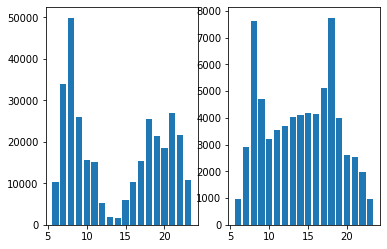

In [0]:
line1['ppl_diff']=np.r_[0, abs(np.diff(line1.유동인구수))]
grouped_line1=line1.groupby('시간대')
grouped_mean=grouped_line1.mean()
plt.subplot(1,2,1)
plt.bar(grouped_mean.index,grouped_mean.ppl_diff)
plt.subplot(1,2,2)
plt.bar(grouped_mean.index,grouped_mean.승하차인원)

In [0]:
line1.유동인구수.isnull().sum()

0

In [0]:
line1.corr()

,호선,날짜,시간대,day,승하차인원,유동인구수,TRANSFER,ppl_diff
호선,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
날짜,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
시간대,NaN,NaN,1.000000e+00,5.290528e-18,-0.125777,-0.237514,NaN,-0.093821
day,NaN,NaN,5.290528e-18,1.000000e+00,0.015086,-0.011328,NaN,0.006855
승하차인원,NaN,NaN,-1.257772e-01,1.508636e-02,1.000000,0.267468,NaN,0.469727
유동인구수,NaN,NaN,-2.375139e-01,-1.132840e-02,0.267468,1.000000,NaN,-0.250105
TRANSFER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ppl_diff,NaN,NaN,-9.382121e-02,6.855364e-03,0.469727,-0.250105,NaN,1.000000


 
3.699 x + 3552


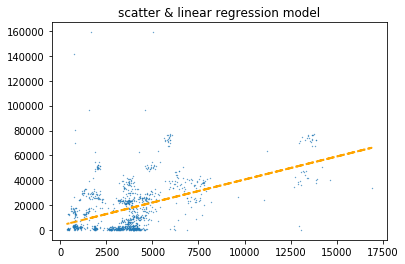

In [0]:
fp1=np.polyfit(line1.승하차인원,line1.ppl_diff,1)
f1=np.poly1d(fp1)
plt.scatter(line1.승하차인원,line1.ppl_diff, s=0.1)
plt.plot(line1.승하차인원,f1(line1.승하차인원),ls='dashed',lw=2,color='orange')
plt.title('scatter & linear regression model')
print(f1)

 
2.707 x + 7306


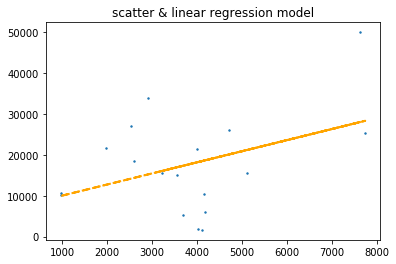

In [0]:
fp1=np.polyfit(grouped_mean.승하차인원,grouped_mean.ppl_diff,1)
f1=np.poly1d(fp1)
plt.scatter(grouped_mean.승하차인원,grouped_mean.ppl_diff, s=2)
plt.plot(grouped_mean.승하차인원,f1(grouped_mean.승하차인원),ls='dashed',lw=2,color='orange')
plt.title('scatter & linear regression model')
print(f1)

In [0]:
df=line1[['ppl_diff','승하차인원']]
df

,ppl_diff,승하차인원
0,0.0,1589.0
1,54450.0,5434.0
2,72380.0,13649.0
3,43360.0,7574.0
4,24300.0,3698.0
...,...,...
1129,430.0,1839.0
1130,2400.0,1123.0
1131,870.0,912.0
1132,3420.0,805.0


In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df[:]=scaler.fit_transform(df[:])
df

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:2945: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc._setitem_with_indexer(key, value)
C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:2930: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pyda

,ppl_diff,승하차인원
0,0.000000,0.074020
1,0.342281,0.306543
2,0.454991,0.803338
3,0.272567,0.435958
4,0.152753,0.201560
...,...,...
1129,0.002703,0.089139
1130,0.015087,0.045839
1131,0.005469,0.033079
1132,0.021499,0.026609


 
0.3845 x + 0.03082


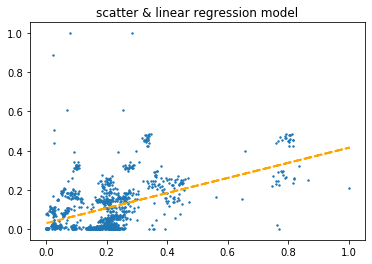

In [0]:
fp1=np.polyfit(df.승하차인원,df.ppl_diff,1)
f1=np.poly1d(fp1)
plt.scatter(df.승하차인원,df.ppl_diff, s=2)
plt.plot(df.승하차인원,f1(df.승하차인원),ls='dashed',lw=2,color='orange')
plt.title('scatter & linear regression model')
print(f1)

In [0]:
df.corr()

,ppl_diff,승하차인원
ppl_diff,1.000000,0.469727
승하차인원,0.469727,1.000000


2호선

In [0]:
line2 = line2.sort_values(by=['역번호','day', '시간대'])
line2

,호선,날짜,역번호,역명,시간대,date,year,month,day,구,승하차인원,일자,유동인구수,TRANSFER
0,2.0,NaN,0202,을지로입구,6.0,2019-10-01,2019,10,1.0,중구,1298.0,20191001,153060.0,0.0
1,2.0,NaN,0202,을지로입구,7.0,2019-10-01,2019,10,1.0,중구,6503.0,20191001,231170.0,0.0
2,2.0,NaN,0202,을지로입구,8.0,2019-10-01,2019,10,1.0,중구,17224.0,20191001,370810.0,0.0
3,2.0,NaN,0202,을지로입구,9.0,2019-10-01,2019,10,1.0,중구,8049.0,20191001,428280.0,0.0
4,2.0,NaN,0202,을지로입구,10.0,2019-10-01,2019,10,1.0,중구,4549.0,20191001,453590.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10957,2.0,NaN,0250,용두(동대문구청),19.0,2019-10-31,2019,10,31.0,동대문구,368.0,20191031,290560.0,0.0
10958,2.0,NaN,0250,용두(동대문구청),20.0,2019-10-31,2019,10,31.0,동대문구,223.0,20191031,292960.0,0.0
10959,2.0,NaN,0250,용두(동대문구청),21.0,2019-10-31,2019,10,31.0,동대문구,182.0,20191031,293830.0,0.0
10960,2.0,NaN,0250,용두(동대문구청),22.0,2019-10-31,2019,10,31.0,동대문구,139.0,20191031,297250.0,0.0


<BarContainer object of 18 artists>

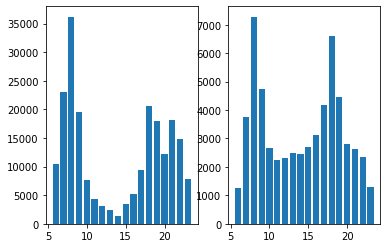

In [0]:
line2['ppl_diff']=np.r_[0, abs(np.diff(line2.유동인구수))]
grouped_line2=line2.groupby('시간대')
grouped_mean=grouped_line2.mean()
plt.subplot(1,2,1)
plt.bar(grouped_mean.index,grouped_mean.ppl_diff)
plt.subplot(1,2,2)
plt.bar(grouped_mean.index,grouped_mean.승하차인원)

In [0]:
line2.corr()

,호선,날짜,시간대,day,승하차인원,유동인구수,TRANSFER,ppl_diff
호선,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
날짜,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
시간대,NaN,NaN,1.000000e+00,6.239174e-18,-0.072057,-0.021592,NaN,-0.064098
day,NaN,NaN,6.239174e-18,1.000000e+00,0.004019,-0.004006,NaN,-0.019360
승하차인원,NaN,NaN,-7.205679e-02,4.019322e-03,1.000000,0.361536,NaN,0.525462
유동인구수,NaN,NaN,-2.159248e-02,-4.006152e-03,0.361536,1.000000,NaN,0.295899
TRANSFER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ppl_diff,NaN,NaN,-6.409783e-02,-1.936012e-02,0.525462,0.295899,NaN,1.000000


 
3.154 x + 1679


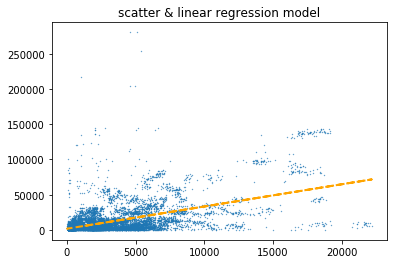

In [0]:
fp1=np.polyfit(line2.승하차인원,line2.ppl_diff,1)
f1=np.poly1d(fp1)
plt.scatter(line2.승하차인원,line2.ppl_diff, s=0.1)
plt.plot(line2.승하차인원,f1(line2.승하차인원),ls='dashed',lw=2,color='orange')
plt.title('scatter & linear regression model')
print(f1)

 
4.264 x - 1981


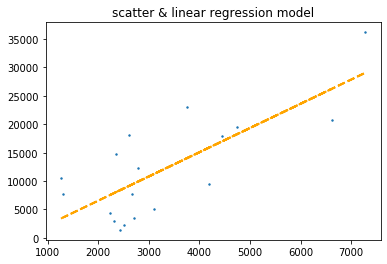

In [0]:
fp1=np.polyfit(grouped_mean.승하차인원,grouped_mean.ppl_diff,1)
f1=np.poly1d(fp1)
plt.scatter(grouped_mean.승하차인원,grouped_mean.ppl_diff, s=2)
plt.plot(grouped_mean.승하차인원,f1(grouped_mean.승하차인원),ls='dashed',lw=2,color='orange')
plt.title('scatter & linear regression model')
print(f1)

In [0]:
df=line2[['ppl_diff','승하차인원']]
df

,ppl_diff,승하차인원
0,0.0,1298.0
1,78110.0,6503.0
2,139640.0,17224.0
3,57470.0,8049.0
4,25310.0,4549.0
...,...,...
10957,430.0,368.0
10958,2400.0,223.0
10959,870.0,182.0
10960,3420.0,139.0


In [0]:
df[:]=scaler.fit_transform(df[:])
df

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:2945: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc._setitem_with_indexer(key, value)
C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:2930: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

,ppl_diff,승하차인원
0,0.000000,0.057367
1,0.278556,0.292484
2,0.497985,0.776764
3,0.204950,0.362318
4,0.090261,0.204219
...,...,...
10957,0.001533,0.015358
10958,0.008559,0.008808
10959,0.003103,0.006956
10960,0.012196,0.005014


 
0.249 x + 0.006302


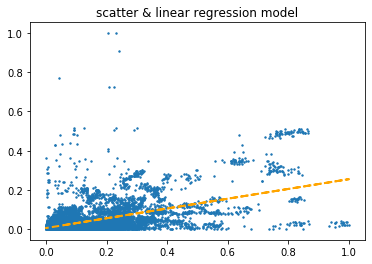

In [0]:
fp1=np.polyfit(df.승하차인원,df.ppl_diff,1)
f1=np.poly1d(fp1)
plt.scatter(df.승하차인원,df.ppl_diff, s=2)
plt.plot(df.승하차인원,f1(df.승하차인원),ls='dashed',lw=2,color='orange')
plt.title('scatter & linear regression model')
print(f1)

In [0]:
df.corr()

,ppl_diff,승하차인원
ppl_diff,1.000000,0.525462
승하차인원,0.525462,1.000000


3호선

In [0]:
line3 = line3.sort_values(by=['역번호','day', '시간대'])
line3

,호선,날짜,역번호,역명,시간대,date,year,month,day,구,승하차인원,일자,유동인구수,TRANSFER
0,3.0,NaN,0310,구파발,6.0,2019-10-01,2019,10,1,은평구,1946.0,20191001,355410.0,0.0
1,3.0,NaN,0310,구파발,7.0,2019-10-01,2019,10,1,은평구,5806.0,20191001,327240.0,0.0
2,3.0,NaN,0310,구파발,8.0,2019-10-01,2019,10,1,은평구,5490.0,20191001,288290.0,0.0
3,3.0,NaN,0310,구파발,9.0,2019-10-01,2019,10,1,은평구,3093.0,20191001,269590.0,0.0
4,3.0,NaN,0310,구파발,10.0,2019-10-01,2019,10,1,은평구,2262.0,20191001,261520.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2155,3.0,NaN,0341,경찰병원,19.0,2019-10-08,2019,10,8,송파구,1240.0,20191008,520680.0,0.0
2156,3.0,NaN,0341,경찰병원,20.0,2019-10-08,2019,10,8,송파구,802.0,20191008,518790.0,0.0
2157,3.0,NaN,0341,경찰병원,21.0,2019-10-08,2019,10,8,송파구,721.0,20191008,516810.0,0.0
2158,3.0,NaN,0341,경찰병원,22.0,2019-10-08,2019,10,8,송파구,596.0,20191008,513700.0,0.0


<BarContainer object of 18 artists>

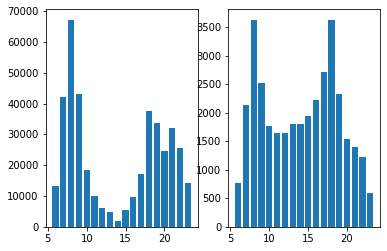

In [0]:
line3['ppl_diff']=np.r_[0, abs(np.diff(line3.유동인구수))]
grouped_line3=line3.groupby('시간대')
grouped_mean=grouped_line3.mean()
plt.subplot(1,2,1)
plt.bar(grouped_mean.index,grouped_mean.ppl_diff)
plt.subplot(1,2,2)
plt.bar(grouped_mean.index,grouped_mean.승하차인원)

In [0]:
line3.corr()

,호선,날짜,시간대,승하차인원,유동인구수,TRANSFER,ppl_diff
호선,NaN,NaN,NaN,NaN,NaN,NaN,NaN
날짜,NaN,NaN,NaN,NaN,NaN,NaN,NaN
시간대,NaN,NaN,1.000000,-0.097734,-0.082125,NaN,-0.087552
승하차인원,NaN,NaN,-0.097734,1.000000,0.112544,NaN,0.302595
유동인구수,NaN,NaN,-0.082125,0.112544,1.000000,NaN,0.292511
TRANSFER,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ppl_diff,NaN,NaN,-0.087552,0.302595,0.292511,NaN,1.000000


4호선

In [0]:
line4 = line4.sort_values(by=['역번호','day', '시간대'])
line4

,호선,날짜,역번호,역명,시간대,date,year,month,day,구,승하차인원,일자,유동인구수,TRANSFER
0,4.0,NaN,0409,당고개,6.0,2019-10-01,2019,10,1,노원구,1115.0,20191001,410930.0,0.0
1,4.0,NaN,0409,당고개,7.0,2019-10-01,2019,10,1,노원구,3136.0,20191001,386840.0,0.0
2,4.0,NaN,0409,당고개,8.0,2019-10-01,2019,10,1,노원구,3143.0,20191001,353810.0,0.0
3,4.0,NaN,0409,당고개,9.0,2019-10-01,2019,10,1,노원구,2010.0,20191001,341340.0,0.0
4,4.0,NaN,0409,당고개,10.0,2019-10-01,2019,10,1,노원구,1465.0,20191001,335620.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,4.0,NaN,0434,남태령,19.0,2019-10-08,2019,10,8,서초구,200.0,20191008,457640.0,0.0
1508,4.0,NaN,0434,남태령,20.0,2019-10-08,2019,10,8,서초구,89.0,20191008,430640.0,0.0
1509,4.0,NaN,0434,남태령,21.0,2019-10-08,2019,10,8,서초구,108.0,20191008,406110.0,0.0
1510,4.0,NaN,0434,남태령,22.0,2019-10-08,2019,10,8,서초구,74.0,20191008,375210.0,0.0


<BarContainer object of 18 artists>

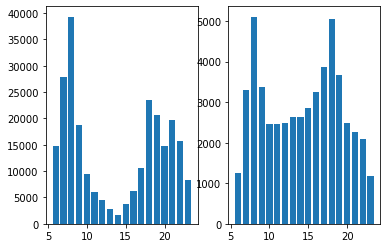

In [0]:
line4['ppl_diff']=np.r_[0, abs(np.diff(line4.유동인구수))]
grouped_line4=line4.groupby('시간대')
grouped_mean=grouped_line4.mean()
plt.subplot(1,2,1)
plt.bar(grouped_mean.index,grouped_mean.ppl_diff)
plt.subplot(1,2,2)
plt.bar(grouped_mean.index,grouped_mean.승하차인원)

In [0]:
line4.corr()

,호선,날짜,시간대,승하차인원,유동인구수,TRANSFER,ppl_diff
호선,NaN,NaN,NaN,NaN,NaN,NaN,NaN
날짜,NaN,NaN,NaN,NaN,NaN,NaN,NaN
시간대,NaN,NaN,1.000000,-0.076686,-0.035754,NaN,-0.088508
승하차인원,NaN,NaN,-0.076686,1.000000,-0.131529,NaN,0.314032
유동인구수,NaN,NaN,-0.035754,-0.131529,1.000000,NaN,0.105694
TRANSFER,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ppl_diff,NaN,NaN,-0.088508,0.314032,0.105694,NaN,1.000000
